In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [47]:
df_accum = pd.read_csv('data/input_df_SUMMmet_accum.csv')
df_ablat = pd.read_csv('data/input_df_SUMMmet_ablat.csv')

sites_to_drop = ['PTSH', 'SPST', 'SR01', 'SR25', 'SR11']
df_accum = df_accum[~df_accum['site.x'].isin(sites_to_drop)]
df_ablat = df_ablat[~df_ablat['site.x'].isin(sites_to_drop)]

df_ablat = df_ablat[df_ablat['delta'] > -30]
df_ablat = df_ablat[df_ablat['delta'] < 50]

df_accum = df_accum[df_accum['delta'] < 40]

df_accum = df_accum.drop(['ant1d_SNOD', 'SNOD', 'date', 'X', 'Unnamed: 0', 'site.x', 'day', 'site.y'], axis = 1)
df_ablat = df_ablat.drop(['ant1d_SNOD', 'SNOD', 'date', 'X', 'Unnamed: 0', 'site.x', 'day', 'site.y'], axis = 1)

column_names = df_ablat.columns


In [51]:
scaler_accum = MinMaxScaler()
df_accum = pd.DataFrame(scaler_accum.fit_transform(df_accum))
df_accum.columns = column_names

scaler_ablat = MinMaxScaler()
df_ablat = pd.DataFrame(scaler_ablat.fit_transform(df_ablat))
df_ablat.columns = column_names

X_accum = df_accum.drop('delta', axis = 1)
y_accum = df_accum['delta']

X_ablat = df_ablat.drop('delta', axis = 1)
y_ablat = df_ablat['delta']

In [52]:
X_accum_train, X_accum_test, y_accum_train, y_accum_test = train_test_split(X_accum,
                                                                            y_accum,
                                                                            test_size=0.2, 
                                                                            random_state=43)
X_ablat_train, X_ablat_test, y_ablat_train, y_ablat_test = train_test_split(X_ablat, 
                                                                            y_ablat, 
                                                                            test_size=0.2, 
                                                                            random_state=43)

In [67]:
accum_backprop = MLPRegressor(hidden_layer_sizes = 5000,
                              activation = 'logistic',
                              learning_rate_init = 0.02,
                              max_iter = 10000,
                              shuffle = True,
                              random_state = 10,
                              tol = 0.0001)
accum_backprop.fit(X_accum_train, y_accum_train)
preds_accum = accum_backprop.predict(X_accum_test)
mse_accum = metrics.mean_squared_error(y_accum_test, preds_accum)


C:\Users\jrladue\AppData\Local\Temp\ipykernel_27940\339988467.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Observed vs Predicted daily change in snow depth')

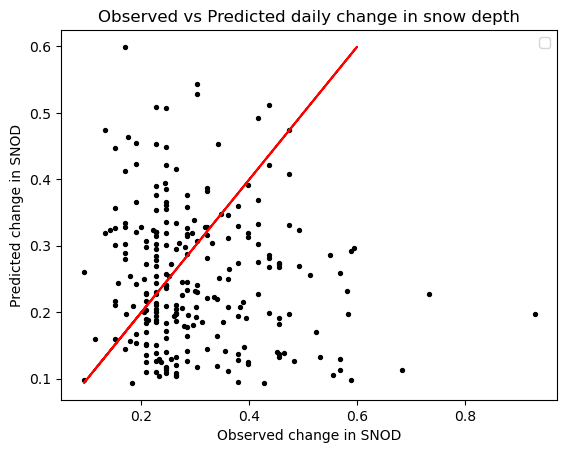

In [68]:
plt.scatter(y_accum_test, preds_accum, s = 8, c = "black")
plt.legend()
plt.plot(preds_accum, preds_accum, c = "red")
plt.xlabel("Observed change in SNOD")
plt.ylabel("Predicted change in SNOD")
plt.title("Observed vs Predicted daily change in snow depth")

In [42]:
p = MinMaxScaler(df_accum)